# Najpopularnejše knjige 20. in 21. stoletja

## Uvod

Za projektno nalogo sem iz spletne strani https://www.goodreads.com/ zbrala podatke o najpopularnejših knjigah 20. stoletja in 21. stoletja.
Podatki temeljijo zgolj na ocenah obiskovalcev te spletne strani.
Podatki so zbrani v dveh datotekah
 - vse-knjige-20-stoletja.csv
 - vse-knjige-21-stoletja.csv


Za vsako knjigo sem zajela sledeče podatke:
- id knjige
- naslov knjige
- avtor knjige
- povprečna ocena knjige
- število ocen
- score knjige (skupen rezultat)
    


## Analiza

Najprej naložimo razpredelnico s katero bomo delali.

In [4]:
import pandas as pd
import numpy as np
knjige20 = pd.read_csv('obdelani-podatki/vse-knjige-20-stoletja.csv', index_col='id')
knjige21 = pd.read_csv('obdelani-podatki/vse-knjige-21-stoletja.csv', index_col='id')
pd.options.display.max_rows = 12
%matplotlib inline

Ali je povprečna ocena višja pri knjigah 20. stoletja ali 21. stoletja?

In [5]:
knjige20.povprecna_ocena.mean()

4.0565165165165169

In [6]:
knjige21.povprecna_ocena.mean()

4.0079799999999999

Opazimo, da imajo knjige iz 20. stoletja v povprečju višjo oceno.

Preštejmo koliko knjig ima povprečno oceno višjo od 4,5 v vsakem seznamu posebaj.

In [7]:
knjige20[knjige20.povprecna_ocena >= 4.5].naslov.count()

13

In [8]:
knjige21[knjige21.povprecna_ocena >= 4.5].naslov.count()

38

Preštejmo koliko knjig je napisal vsak izmed avtorjev. V ta namen seznama združimo, razvrstimo knjige po avtorjih in preštejemo koliko knjig je napisal vsak avtor.

In [9]:
vse_knjige = knjige20.append(knjige21)
knjige_po_avtorjih = vse_knjige.groupby('avtor')
knjige_po_avtorjih.size().head(8)

avtor
A.A. Milne          2
A.J. Jacobs         1
A.S. Byatt          2
Abraham Verghese    1
Adam Johnson        1
Adolf Hitler        1
Agatha Christie     7
Alan Bennett        1
dtype: int64

Kateri avtorji so napisali največ knjig na seznamu? Tem avtorjem bomo rekli najbolj brani avtorji. 
Rezultat za prvih 15 najbolj branih avtorjev predstavimo v stolpičnem diagramu.

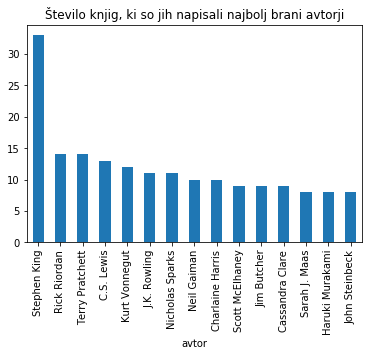

In [10]:
knjige_po_avtorjih = vse_knjige.groupby('avtor')
st_razlicnih_avtorjev = knjige_po_avtorjih.size().count()
graf_avtorji = knjige_po_avtorjih.size().sort_values(
    ascending=False).head(st_razlicnih_avtorjev).head(15)
graf_avtorji.sort_values(ascending=False).plot(kind='bar', title = 'Število knjig, ki so jih napisali najbolj brani avtorji')

Vidimo, da je najbolj priljubljen avtor Stephen King. Podrobneje si poglejmo knjige, ki jih je napisal.

In [64]:
Stephen_King = vse_knjige[vse_knjige.avtor == 'Stephen King'].sort_values('povprecna_ocena', ascending=False)
Stephen_King.head(10)

,naslov,avtor,povprecna_ocena,st_ocen,score
id,,,,,
11566,The Green Mile,Stephen King,4.43,212217,8.374
39662,Different Seasons,Stephen King,4.35,152194,10.881
149267,The Stand,Stephen King,4.34,525794,129.000
10569,On Writing: A Memoir of the Craft,Stephen King,4.32,178476,1.244
10644930,11/22/63,Stephen King,4.30,346741,14.289
5091,The Dark Tower,Stephen King,4.28,121282,1.194
830502,It,Stephen King,4.22,617027,23.030
11588,The Shining,Stephen King,4.20,922227,32.042
4978,Wolves of the Calla,Stephen King,4.18,132049,818.000


Poglejmi si povprečno oceno in score vseh knjih, ki jih je napisal Stephen King. Koliko ljudi je ocenilo njegove knjige? 

In [12]:
Stephen_King.povprecna_ocena.mean() 

4.0084848484848488

In [13]:
Stephen_King.score.mean()

144.04399999999998

In [14]:
vse_knjige[vse_knjige.avtor == 'Stephen King'].sum()[['st_ocen']]

st_ocen    7438781
dtype: object

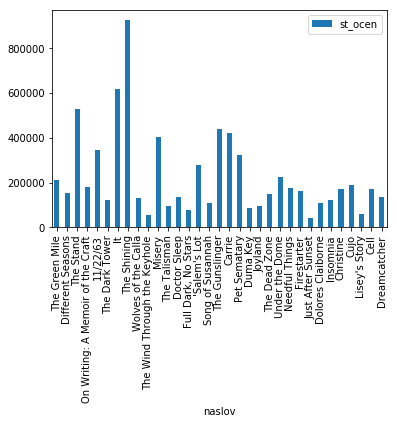

In [15]:
Stephen_King.plot.bar('naslov', 'st_ocen')

Povprečna ocena knjig Stephana Kinga je 4.0085, povprečen score je 144.04. Skupno je njegove knjige ocenilo 7438781 ljudi, podatki o številu ocen za vsako knjigo posebaj so predstavljeni v zgornjem grafu.

Povprečno oceno in povprečen score del posameznega avtorja predstavimo v spodnjih tabelah.

In [16]:
povprecje_po_avtorjih = knjige_po_avtorjih.mean()[['povprecna_ocena', 'score']]
povprecje_po_avtorjih.head(8)

,povprecna_ocena,score
avtor,,
A.A. Milne,4.350000,31.024500
A.J. Jacobs,3.760000,402.000000
A.S. Byatt,3.775000,487.769500
Abraham Verghese,4.280000,14.328000
Adam Johnson,4.070000,2.369000
Adolf Hitler,3.150000,1.422000
Agatha Christie,4.114286,143.769714
Alan Bennett,3.810000,679.000000


In [17]:
skupno_st_glasov_po_avtorjih = knjige_po_avtorjih.sum()[['st_ocen']]
skupno_st_glasov_po_avtorjih.head(8)

,st_ocen
avtor,
A.A. Milne,305697
A.J. Jacobs,56995
A.S. Byatt,77771
Abraham Verghese,309233
Adam Johnson,74558
Adolf Hitler,27445
Agatha Christie,1377246
Alan Bennett,26842


Katere avtorja je ocenilo največ ljudi? Poglejmo si prvih 15 avtorjev.

In [43]:
najvec_ocen = skupno_st_glasov_po_avtorjih.sort_values('st_ocen', ascending=False)[(skupno_st_glasov_po_avtorjih.st_ocen > 4047130)]
najvec_ocen

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,st_ocen
avtor,
J.K. Rowling,19315567
Suzanne Collins,9863382
Stephenie Meyer,9102296
Dan Brown,8156273
Harper Lee,7718237
Stephen King,7438781
...,...
J.D. Salinger,5039480
Cassandra Clare,4974816


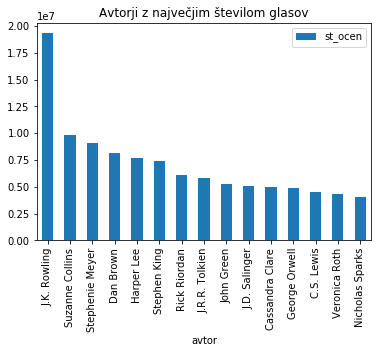

In [41]:
najvec_ocen.plot(kind='bar', title = 'Avtorji z največjim številom glasov')

Največ ljudi je ocenilo pisateljico J.K.Rowling. Podrobneje si poglejmo še njena dela.

In [ ]:
V zgornji tabeli razberemo, da so njena dela skupno prejela 19315567 ocen.

In [49]:
J_K_Rowling = vse_knjige[vse_knjige.avtor == 'J.K. Rowling']
J_K_Rowling

,naslov,avtor,povprecna_ocena,st_ocen,score
id,,,,,
3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4.46,5621523,666.000
5,Harry Potter and the Prisoner of Azkaban,J.K. Rowling,4.55,2228890,277.000
15881,Harry Potter and the Chamber of Secrets,J.K. Rowling,4.40,2174931,193.000
6,Harry Potter and the Goblet of Fire,J.K. Rowling,4.54,2088537,17.167
862041,Harry Potter Series Box Set,J.K. Rowling,4.74,222743,6.139
136251,Harry Potter and the Deathly Hallows,J.K. Rowling,4.62,2078078,385.000
1,Harry Potter and the Half-Blood Prince,J.K. Rowling,4.55,2000730,215.000
2,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.48,2050942,195.000
862041,Harry Potter Series Box Set,J.K. Rowling,4.74,222739,99.807


In [50]:
J_K_Rowling.povprecna_ocena.mean() 

4.4036363636363642

In [51]:
J_K_Rowling.score.mean()

187.65663636363635

Povprečna ocena njenih del je 4,404 povprečen score pa 187,66.

Poskusimo glede na naše želje najti najboljše knjige 20. in 21. stoletja. Za kriterij upoštevamo povprečno oceno, score in število ocen.
V ta namen definiramo funkcijo, ki nam vrne seznam dobrih oziroma slabih knjig glede na naše želje.

In [18]:
def kriterij_dobre_knjige21 (score, ocena, st_oc):
    return knjige21[(knjige21.score > score) & 
                          (knjige21.povprecna_ocena > ocena) &
                          (knjige21.st_ocen > st_oc)]

def kriterij_dobre_knjige20 (score, ocena, st_oc):
    return knjige20[(knjige20.score > score) & 
                          (knjige20.povprecna_ocena > ocena) &
                          (knjige20.st_ocen > st_oc)]
def kriterij_dobre_knjige (score, ocena, st_oc):
    return vse_knjige[(vse_knjige.score > score) & 
                          (vse_knjige.povprecna_ocena > ocena) &
                          (vse_knjige.st_ocen > st_oc)]

Denimo, da želimo najti vse knjige, ki imajo score višji od 400, povprečno oceno višjo od 4.5 in stevilo ocen visjo od 5000. 

In [29]:
kriterij_dobre_knjige(400, 4.5, 5000)

,naslov,avtor,povprecna_ocena,st_ocen,score
id,,,,,
44234,The Civil War: A Narrative,Shelby Foote,4.52,6583,892.0
6585201,Changes,Jim Butcher,4.54,81434,945.0
32075671,The Hate U Give,Angie Thomas,4.56,205790,728.0
17927395,A Court of Mist and Fury,Sarah J. Maas,4.69,199152,726.0
18006496,Queen of Shadows,Sarah J. Maas,4.59,157786,640.0
12216302,Cold Days,Jim Butcher,4.51,73305,616.0
17332218,Words of Radiance,Brandon Sanderson,4.77,142492,532.0
28260587,Empire of Storms,Sarah J. Maas,4.57,115914,527.0


Ali obstaja povezava med povprecno oceno knjige in scorom knjige?

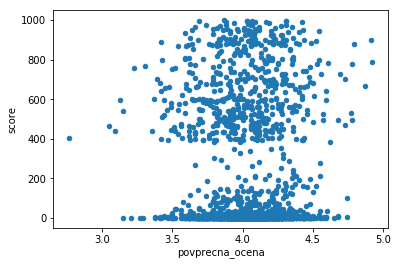

In [21]:
vse_knjige.plot.scatter('povprecna_ocena', 'score')

Vidimo, da je graf zelo razdrobljen. Imamo veliko odstopanj v podatkih.

Lahko poskusimo podatke filtrirati tako, da v graf vključimo le knjige, za katere je glasovalo vsaj 1.000.000 ljudi in s tem povečamo verodostojnost ocen. Tako se na primer izognemo knjigam, ki imajo visoko oceno, a je zanje glasovalo zelo malo ljudi.

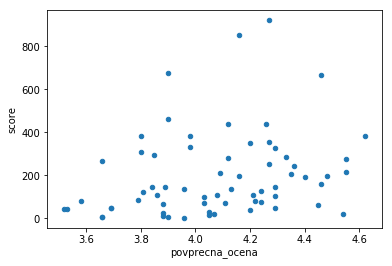

In [22]:
verodostojne_knjige = vse_knjige[(vse_knjige.st_ocen > 1000000)]
verodostojne_knjige.plot.scatter('povprecna_ocena', 'score')

Tudi po filtraciji podatkov je graf še vedno dokaj razdrobljen. Sklepamo, da ocena in score knjige nista povezana oziroma je score določen na podlagi drugih dejavnikov.
Lahko pa spletna stran ne ponuja zanesljivih podatkov.